In [15]:
%%html
<style>
    table{
        width:70%;
    }
</style>

## EM algrithom

### 原理

EM算法是存在隐变量下的极大似然估计
$$ MLE  \xrightarrow[]{\text{latent variable } Z}  EM  $$ 

E step: 
$$ E_{Z|Y,\theta^{(t)}} [P(Y,Z|\theta] $$

M step:
$$ \theta^{(t+1)} = \arg\max_{\theta}  E_{Z|Y,\theta^{(t)}} [ \log P(Y,Z | \theta) ] $$

### 推导

似然函数 $L(\theta)$ 为（考虑隐变量$Z$的）Y的极大似然估计

$$ 
\begin{align}
L(\theta) =& \sum_{i=1}^N \log P(Y | \theta) \\
          =& \sum_{i=1}^N \log \sum_{z} P(Y, Z | \theta) \\
          =& \sum_{i=1}^N \log \sum_{z} P(Z|Y,\theta^{(t)}) \frac{P(Y, Z | \theta)}{P(Z|Y,\theta^{(t)})} \\
          \geq & \sum_{i=1}^N \sum_{z} P(Z|Y,\theta^{(t)}) \log \frac{P(Y, Z | \theta)}{P(Z|Y,\theta^{(t)})} \\
\end{align}
$$

- 不等号是詹森不等式 Jensen Inequality 的应用
- 第3，4个等号，同时乘以隐变量在【当前模型参数$\theta^{(t)}$ 和 观测$Y$】下的条件概率分布 $P(Z|Y,\theta^{(t)})$
- 当Z为常量时取等号，ie. $P(Z_z|Y_i,\theta^\star) \rightarrow 1$ 随着迭代过程的演进，每个样本的隐变量取值趋于确定 【个人理解，待验证】

因为我们的目的是最大化似然函数，抛开常数项，似然函数下界的最大化问题为

$$ \max_{\theta} \sum_{i=1}^N \sum_{z} P(Z|Y,\theta^{(t)}) \log P(Y, Z | \theta) $$

上式中最大化的目标函数也称为Q函数。外层求和号里面的公式可以写为 $$ E_{Z|Y,\theta^{(t)}} \log P(Y,Z|\theta) $$ 即EM算法名字中的E步。

M步，即（在当前模型基础上）极大化Q函数:

1. 根据模型的具体形式写出 $P(Z|Y,\theta), P(Y,Z|\theta)$ 的具体形式
2. 对$\theta$各分量求偏导数，令其为0，解出迭代公式

### 三硬币模型

#### Notations

参数： $$ \theta = \begin{bmatrix} P_A \\ P_B \\ \pi \\ \end{bmatrix} \\ $$

条件概率 P(Z|Y)：
$$ 
\begin{align}
\hat \gamma_{Ai}^{(t)} &\overset{\triangle}{=} P(Z_i=A|Y_i,\theta^{(t)})   \\
\hat \gamma_{Bi}^{(t)} &\overset{\triangle}{=} P(Z_i=B|Y_i,\theta^{(t)}) = 1 - \hat\gamma_{Ai}^{(t)}
\end{align}
$$

完全概率 P(Y,Z)

| Complete Prob P(Y,Z) | Y=1           | Y=0               | Compact form                  |
|----------------------|---------------|-------------------|-------------------------------|
| Z=coinA              | $\pi P_A$     | $\pi (1-P_A)$     | $\pi P_A^y (1-P_A)^{1-y}$     |
| Z=coinB              | $(1-\pi) P_B$ | $(1-\pi) (1-P_B)$ | $(1-\pi) P_B^y (1-P_B)^{1-y}$ |

#### 迭代公式的具体形式推导

注意，当前模型下的条件概率 $\hat\gamma_{Ai}^{(t)}, \hat\gamma_{Bi}^{(t)}$ 都是可计算的数字，完全概率查上表可得

写出三硬币模型对数似然函数的具体形式：

$$ \begin{align}
L(\theta) &= \sum_{i=1}^N \sum_z P(Z|Y,\theta^{(t)}) \log P(Y,Z|\theta)  \\
          &= \sum_{i=1}^N \hat\gamma_{Ai}^{(t)} \boxed{ \log P(Y,Z|\theta) } + 
                          \hat\gamma_{Bi}^{(t)} \boxed{ \log P(Y,Z|\theta) } \\
          &= \sum_{i=1}^N \hat\gamma_{Ai}^{(t)} \boxed{ \log[\pi P_A^y(1-P_A)^{1-y}] } + 
                          \hat\gamma_{Bi}^{(t)} \boxed{ \log[(1-\pi)P_B^y(1-P_B)^{1-y}] } \\
          &= \sum_{i=1}^N \hat\gamma_{Ai}^{(t)} \boxed{ \log\pi + y\log P_A + (1-y)\log(1-P_A)) }+ 
                          \hat\gamma_{Bi}^{(t)} \boxed{ \log(1-\pi) + y\log P_B + (1-y)\log(1-P_B)) }\\
\end{align}$$ 

求偏导数，令其为零：

$$
\begin{align}
\frac{\partial L}{\partial \pi} &= 
                \sum_{i=1}^N \hat\gamma_{Ai}^{(t)} \frac{1}{\pi} + \hat\gamma_{Bi}^{(t)} \frac{1}{1-\pi} &=0 \\
\frac{\partial L}{\partial P_A} &= \sum_{i=1}^N \hat\gamma_{Ai}^{(t)} ( \frac{y_i}{P_A} - \frac{1-y_i}{1-P_A} ) &=0\\
\frac{\partial L}{\partial P_B} &= \sum_{i=1}^N \hat\gamma_{Bi}^{(t)} ( \frac{y_i}{P_B} - \frac{1-y_i}{1-P_B} ) &=0\\
\end{align}
$$ 

简单的整理，得到解
$$
\begin{align}
\pi &= \frac{\sum_{i=1}^{N} \hat\gamma_{Ai}^{(t)}}{N} \\
P_A &= \frac{\sum_{i=1}^{N} \hat\gamma_{Ai}^{(t)} y_i}{ \sum_{i=1}^{N} \hat\gamma_{Ai}^{(t)} } \\
P_B &= \frac{\sum_{i=1}^{N} \hat\gamma_{Bi}^{(t)} y_i}{ \sum_{i=1}^{N} \hat\gamma_{Bi}^{(t)} } = 
  \frac{\sum_{i=1}^{N} (1-\hat\gamma_{Ai}^{(t)}) y_i}{ \sum_{i=1}^{N} (1-\hat\gamma_{Ai}^{(t)}) } \\
\end{align}
$$

回忆一下 $\hat\gamma_{A_i}^{(t)}$的含义：它是指在$t$次迭代的模型中，根据每个样本观测值$Y_i$，样本$i$的隐变量$Z_i$为硬币A的条件概率。

根据条件概率公式：
$$ 
\hat\gamma_{A_i}^{(t)} = P(Z_i=A|Y_i,\theta^{(t)}) = \frac{P(Z_i=A,Y_i|\theta^{(t)})}{P(Y_i|\theta^{(t)})} = 
\begin{cases}
\frac{\pi P_A^{(t)}}{\pi^{(t)} P_A^{(t)} + \big(1-\pi^{(t)}\big) P_B^{(t)}}, & Y_i = 1 \\
\frac{\pi \big(1-P_A^{(t)}\big)}{\pi^{(t)} \big(1-P_A^{(t)}\big) + \big(1-\pi^{(t)}\big)\big(1-P_B^{(t)}\big)}, & Y_i = 0 
\end{cases}
$$

在每一轮迭代中，会计算出每个样本的 $\hat\gamma_{A_i}^{(t)}$, $\hat\gamma_{B_i}^{(t)}$，观察发现他们应该是逐渐趋于真实的$\gamma_i$。

#### 三硬币模型 Code

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


# Data Generating Process
N = 10000
pi = 0.3
pa = 0.9
pb = 0.1

df = pd.DataFrame({'Z': np.random.choice(['A', 'B'], N, p=[pi, 1-pi])})
s = df.groupby('Z').apply(lambda df: np.random.choice([1,0], len(df), p=[pa,1-pa] if df['Z'].unique() == 'A' else [pb,1-pb]))
df.loc[df.Z == 'A', 'Y'] = s['A']
df.loc[df.Z == 'B', 'Y'] = s['B']
df['Y'] = df['Y'].astype(int)

#df.head()

In [6]:
def CondP_A(y, pi, pa, pb):
    """条件后验概率函数 P(Z=A|Y)
    
    y: array.
    pi, pa, pb: scalar
    returns: array
    """
    N = len(y)
    pA1 = _CondP_1(pi, pa, pb)
    pA0 = _CondP_0(pi, pa, pb)
    return np.repeat(pA1, N) * y + np.repeat(pA0, N) * (1-y)

def _CondP_1(pi, pa, pb):
    """P(Z=A|Y=1)"""
    return pi*pa /(pi * pa + (1-pi) * pb)

def _CondP_0(pi, pa, pb):
    """P(Z=A|Y=0)"""
    return pi*(1-pa) /(pi * (1-pa) + (1-pi) * (1-pb))

df['CondProb_A'] = CondP_A(df['Y'], pi, pa, pb)
df['CondProb_B'] = 1 - df['CondProb_A']
#df.head()

In [7]:
def updated_param(condprobA, y):
    """更新参数 theta = [PA, PB, pi]
    
    *发现参数迭代公式中只有条件概率P(Z|Y)，而完全概率P(Y,Z)由于具有具体形式，在求偏导数的过程中已经用掉了*
    """
    pi = np.average(condprobA)
    pa = np.average(y, weights=condprobA)
    pb = np.average(y, weights=1-condprobA)
    return pi, pa, pb

#updated_param(df['CondProb_A'], df['Y'])

In [11]:
n_iter = 10

y = df['Y'].values
theta = 0.4, 0.8, 0.2

print('true value:')
print((pi, pa, pb), 'P(Z=A|Y=1):', _CondP_1(pi, pa,pb), 'P(Z=A|Y=0):', _CondP_0(pi, pa, pb))
print("P(Y=1)", pi * pa + (1-pi)*pb)
print('----------------------')

for i in range(n_iter):
    _pi, _pa, _pb = theta
    PY1 = _pi * _pa + (1-_pi)*_pb
    PZ0 = _CondP_0(*theta)
    PZ1 = _CondP_1(*theta)
    print(theta, 'P(Z=A|Y=1):', PZ1, 'P(Z=A|Y=0):', PZ0, 'P(Y=1):', PY1)
    condprobA = CondP_A(y, *theta)
    theta = updated_param(condprobA, y)

true value:
(0.3, 0.9, 0.1) P(Z=A|Y=1): 0.7941176470588235 P(Z=A|Y=0): 0.04545454545454544
P(Y=1) 0.34
----------------------
(0.4, 0.8, 0.2) P(Z=A|Y=1): 0.7272727272727273 P(Z=A|Y=0): 0.14285714285714285 P(Y=1): 0.44000000000000006
(0.34237662337662345, 0.725198194439176, 0.14158421707447116) P(Z=A|Y=1): 0.7272727272727274 P(Z=A|Y=0): 0.14285714285714296 P(Y=1): 0.3413999999999999
(0.34237662337662345, 0.7251981944391761, 0.1415842170744712) P(Z=A|Y=1): 0.7272727272727274 P(Z=A|Y=0): 0.1428571428571429 P(Y=1): 0.34140000000000004
(0.34237662337662345, 0.7251981944391761, 0.14158421707447114) P(Z=A|Y=1): 0.7272727272727275 P(Z=A|Y=0): 0.14285714285714288 P(Y=1): 0.3414
(0.34237662337662345, 0.7251981944391761, 0.14158421707447114) P(Z=A|Y=1): 0.7272727272727275 P(Z=A|Y=0): 0.14285714285714288 P(Y=1): 0.3414
(0.34237662337662345, 0.7251981944391761, 0.14158421707447114) P(Z=A|Y=1): 0.7272727272727275 P(Z=A|Y=0): 0.14285714285714288 P(Y=1): 0.3414
(0.34237662337662345, 0.7251981944391761

#### 三硬币模型：结论

尝试各种真实参数、初始参数，结果发现几乎100%会陷入错误的局部最优值。且无视隐变量、只看最终结果的概率 P(Y=1) 也不一定能正确估计。

直觉上很好理解：这个模型本身就难通过一个0-1变量将Z的概率剥离出来，每个样本只有一次观测，当你仅有一个观测样本Y=1，很难说究竟是因为pi很大还是因为 P_A or P_B 比较大。

- 拓展的三硬币模型：见 *What's EM ?*, Chuong B Do & Serafim Batzoglou
- 高斯混合模型

### 拓展的三硬币模型

每个样本扔多次第二阶段硬币。Head,Tail 顺序不重要，重要的是 #H, #T。iid 0-1分布之和服从二项分布。

$$ P(Z=A|y) = \frac{P(Z=A,y)}{P(y)} = \frac{P(Z=A,y)}{P(Z=A,y) + P(Z=B,y)} $$   
$$ P(Z=B|y) = \frac{P(Z=B,y)}{P(y)} = \frac{P(Z=B,y)}{P(Z=A,y) + P(Z=B,y)} $$

where  $$y= \text{# of Head} $$

$$ P(Z=A,y) = P(y|Z=A) P(Z=A) = \pi P_A^y (1-P_A)^{n-y}$$    
$$ P(Z=B,y) = P(y|Z=B) P(Z=B) = (1-\pi) P_B^y (1-P_B)^{n-y}$$


对数似然函数：

$$
\begin{align} 
L(\theta) &= \sum_{i=1}^N \log P(y)  \\
          &= \sum_{i=1}^N \log [P(y,A) + P(y,B)] \\
          &= \sum_{i=1}^N \log [P(y,A) + P(y,B)] \\
          &\geq \sum_{i=1}^N P(A|Y,\theta^{(t)}) \log\frac{P(y,A)}{P(A|Y,\theta^{(t)})} + 
                             P(B|Y,\theta^{(t)}) \log\frac{P(y,B)}{P(B|Y,\theta^{(t)})} \\
          &\overset{max}{=} \sum_{i=1}^N P(A|Y,\theta^{(t)}) \log P(y,A) + 
                                         P(B|Y,\theta^{(t)}) \log P(y,B)\\
          &= \sum_{i=1}^N \hat\gamma_{Ai}^{(t)} [\log\pi + y_i\log P_A + (n-y_i)\log(1-P_A)] + 
                          \hat\gamma_{Bi}^{(t)} [\log(1-\pi) + y_i\log P_B + (n-y_i)\log(1-P_B)] \\
\end{align}
$$

求偏导数，令等于0

$$
\begin{align} 
\frac{\partial L}{\partial \pi} &= \sum_{i=1}^N \hat\gamma_{Ai}^{(t)} \frac{1}{\pi} - \hat\gamma_{Bi}^{(t)} \frac{1}{1-\pi}   &= 0  \\
\frac{\partial L}{\partial P_A} &= \sum_{i=1}^N \hat\gamma_{Ai}^{(t)} \Big(\frac{y_i}{P_A} - \frac{n-y_i}{1-P_A} \Big)        &= 0  \\
\frac{\partial L}{\partial P_B} &= \sum_{i=1}^N \hat\gamma_{Bi}^{(t)} \Big(\frac{y_i}{P_B} - \frac{n-y_i}{P_B} \Big)          &= 0
\end{align}
$$

每次更新参数：

$$
\begin{align} 
\pi &= \frac{ \sum_{i=1}^N \hat\gamma_{Ai}^{(t)} }{N}  \\
P_A &= \frac{ \sum_{i=1}^N \hat\gamma_{Ai}^{(t)} y_i }{ n \sum_{i=1}^N \hat\gamma_{Ai}^{(t)} }  \\
P_B &= \frac{ \sum_{i=1}^N \hat\gamma_{Bi}^{(t)} y_i }{ n \sum_{i=1}^N \hat\gamma_{Bi}^{(t)} }  \\
\end{align} 
$$

In [12]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


# Data Generating Process
N = 10000
n = 5  # 一个样本扔5次第二阶段硬币
pi = 0.3
pa = 0.9
pb = 0.1

df = pd.DataFrame({'Z': np.random.choice(['A', 'B'], N, p=[pi, 1-pi])})

s = df.groupby('Z').apply(lambda df: np.random.binomial(n, pa if df['Z'].unique() == 'A' else pb, len(df)))
df.loc[df.Z == 'A', '#Head'] = s['A']
df.loc[df.Z == 'B', '#Head'] = s['B']
df['#Head'] = df['#Head'].astype(int)

df.head()

,Z,#Head
0,B,0
1,A,4
2,A,4
3,B,1
4,B,0


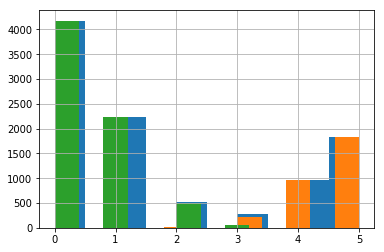

In [33]:
df['#Head'].hist()
df.loc[df.Z == 'A', '#Head'].hist()
df.loc[df.Z == 'B', '#Head'].hist()

In [17]:
def CondProb(y, pi, pa, pb, n):
    a = pi * np.power(pa, y) * np.power(1-pa, n-y)
    b = (1-pi) * np.power(pb, y) * np.power(1-pb, n-y)
    return a / (a + b), b / (a + b)
    #return a, b

In [18]:
def update(y, pi, pa, pb, n):
    gammaA, gammaB = CondProb(y, pi, pa, pb, n)
    N = len(y)
    pi = np.sum(gammaA) / N
    pa = np.sum(gammaA * y) / (n * np.sum(gammaA))
    pb = np.sum(gammaB * y) / (n * np.sum(gammaB))
    return pi, pa, pb

In [19]:
def print_summary(theta):
    print('theta={}'.format(theta))

In [27]:
print('true value:')
print_summary((pi, pa, pb))
print('========================')
y = df['#Head'].values

theta = (0.9, 0.6, 0.4)

for i in range(10):
    print_summary(theta)
    theta = update(y, *theta, n)

true value:
theta=(0.3, 0.9, 0.1)
theta=(0.9, 0.6, 0.4)
theta=(0.7330639077491118, 0.43838038201815205, 0.08001602142714324)
theta=(0.5861873925921142, 0.5579616708713238, 0.03781881630825613)
theta=(0.47688395650432547, 0.6687542715081825, 0.04550007091152588)
theta=(0.3917831292872833, 0.7735603891299464, 0.06519399898841377)
theta=(0.34227281803984516, 0.8472060683009128, 0.08019189869118755)
theta=(0.31801292834308925, 0.8838094812185043, 0.09040810499606504)
theta=(0.3089518319544538, 0.8971292243530641, 0.0948563148957257)
theta=(0.3059737068365915, 0.9011254903299453, 0.09653711114231603)
theta=(0.3050123796743699, 0.9023446247736487, 0.09711499419196776)


#### 拓展的三硬币模型：结论

目测效果明显更好。